The previous notebook described the creation of anomaly maps from a prepared xarray dataset of anomalies. Here I show how I created the year-averaged chlorophyll maps for Aqua with two slightly different color scales.

In [1]:
import pathlib
import os

import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import colors
import matplotlib.ticker as mtick
from matplotlib import rcParams
from cmocean import cm 
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.geoaxes import GeoAxes
from IPython.core.display import HTML, display

In [2]:
from cartopy import __version__ as cv

In [3]:
cv

'0.16.0'

In [4]:
from matplotlib import __version__ as mv

In [5]:
mv

'3.0.2'

In [16]:
xr.__version__

'0.11.0'

In [6]:
# Global graphics setup 
rcParams['figure.titlesize'] = 20
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['ytick.minor.visible']=True

In [7]:
% matplotlib inline

In [8]:
def set_ticks(ax, lat_ticks, lon_ticks, transform):
    ax.set_xticks(lon_ticks, minor=True, crs=transform)
    ax.set_yticks(lat_ticks, crs=transform)
    ax.xaxis.set_minor_locator(mtick.FixedLocator(range(-180, 181, 10)))
    ax.yaxis.set_minor_locator(mtick.FixedLocator(range(-90, 90, 10)))
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)


def set_map(ax, transform):    
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.LAND, facecolor='gray')
    ax.add_feature(cf.OCEAN, zorder=0, facecolor='k')
    lon_ticks = range(0, 361, 60)
    lat_ticks = range(-60, 61, 60) 
    isot=dict(north=df_north, south=df_south)
    plot_isotherm(ax, isot['north'], transform=transform)
    plot_isotherm(ax, isot['south'], transform=transform)
    set_ticks(ax, lat_ticks, lon_ticks, transform=transform)
    return None

    
def map_ax(ax, data_array, **kwargs):
    vmin = kwargs.pop('vmin', 0.01)
    vmax = kwargs.pop('vmax', 20)
    cmap = kwargs.pop('cmap', 'viridis')
    cbar_orient = kwargs.pop('cb_orient', 'horizontal')
    transform = kwargs.pop('transform', ccrs.PlateCarree())
    set_map(ax, transform)
    bar_ticks = mtick.LogLocator(subs=range(10))
    artist = data_array.plot.pcolormesh(x='lon', y='lat', norm=colors.LogNorm(),
                                       ax=ax, transform=transform, cmap=cmap,
                                       vmin=vmin, vmax=vmax,
                                       cbar_kwargs={'ticks': bar_ticks,
                                                    'orientation': 'horizontal',
                                                    'fraction': 0.05,
                                                    'pad': 0.08,
                                                    'label': '$mg\ m^{-3}$',
                                                    'extend':'both',
                                                    'aspect': 30,})
    ax.set_xlabel('')
    ax.set_ylabel('')
    return artist


def plot_isotherm(ax, df, transform):
    ax.plot(df.lon, df.lat, zorder=1, lw=3, color='k', transform=transform)
    return None

In [9]:
df_south = pd.read_csv('../sst_iso_south.txt', delim_whitespace=True,
                       names=['lon', 'lat'])
df_north = pd.read_csv('../sst_iso_north.txt', delim_whitespace=True,
                      names=['lon', 'lat'])

ds = xr.open_dataset('../xr_sst_chl.nc')

ds

<xarray.Dataset>
Dimensions:             (lat: 2160, lon: 4320, time: 9)
Coordinates:
  * time                (time) datetime64[ns] 2018-01-01 ... 2018-09-01
  * lat                 (lat) float32 89.958336 89.875 ... -89.87501 -89.958336
  * lon                 (lon) float32 -179.95833 -179.875 ... 179.95836
Data variables:
    sst                 (time, lat, lon) float64 ...
    chlor_a             (time, lat, lon) float64 ...
    year_avg_viirs_chl  (lat, lon) float64 ...
    year_avg_aqua_sst   (lat, lon) float64 ...
    year_avg_aqua_chl   (lat, lon) float64 ...

In [10]:
central_long = -150
lat = ds.lat
lon = ds.lon
prod_aqua = ds.year_avg_aqua_chl
proj = ccrs.PlateCarree(central_longitude=central_long)

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


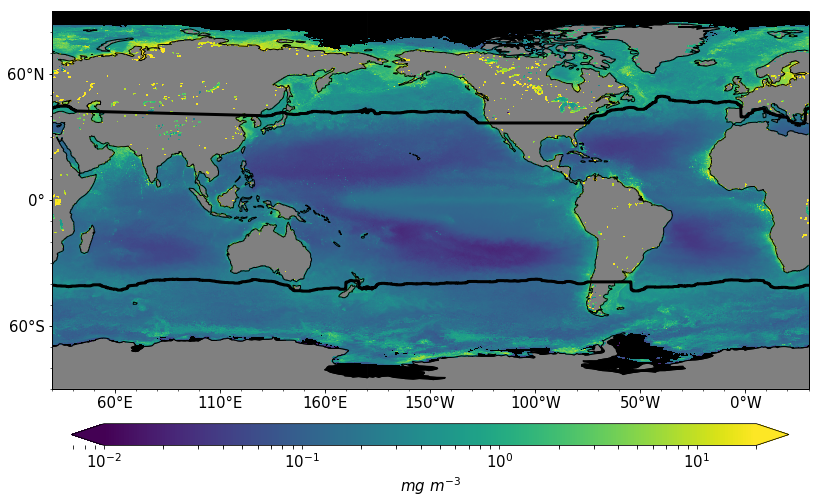

In [11]:
f_aq_chl, ax = pl.subplots(figsize=(14, 8),
                           subplot_kw={'projection': proj})

qm = map_ax(ax, prod_aqua)

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


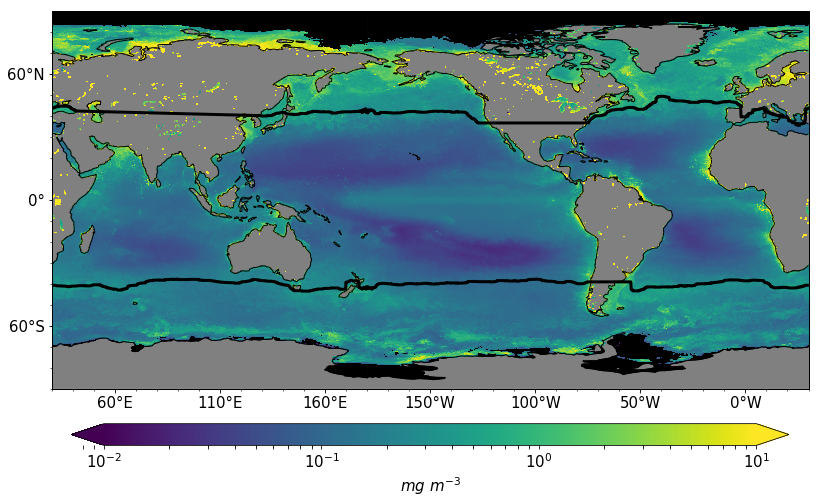

In [13]:
f_aq_chl_max_10, ax = pl.subplots(figsize=(14, 8),
                          subplot_kw={'projection': proj})
qm = map_ax(ax, prod_aqua, vmax=10)

In [14]:
f_aq_chl_max_10.savefig('../FigJar/aq_chl_2018_viridis_max_10.png', dpi=300)

In [15]:
f_aq_chl.savefig('../FigJar/aq_chl_2018_viridis.png', dpi=300)